#**Lab 3 - Boston Housing**

https://keras.io/api/datasets/boston_housing/

In [63]:
# Load the dataset
import numpy as np
import pandas as pd
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing.npz', test_split = 0.2, seed = 113)

x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [64]:
x_train = pd.DataFrame(x_train, columns = range(x_train.shape[1]))
y_train = pd.DataFrame(y_train, columns = ['Target'])
x_test = pd.DataFrame(x_test, columns = range(x_test.shape[1]))
y_test = pd.DataFrame(y_test, columns = ['Target'])

In [65]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (404, 13)
y_train shape (404, 1)
x_test shape (102, 13)
y_test shape (102, 1)


In [66]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [67]:
y_train.describe()

,Target
count,404.000000
mean,22.395050
std,9.210442
min,5.000000
25%,16.675000
50%,20.750000
75%,24.800000
max,50.000000


In [68]:
# Normalization
# The reason perform normalization because all the feature variables are using different units
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train =  scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [77]:
from keras.layers import Input, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

L1 = 200
L2 = 100
L3 = 50

early_stopping_monitor = EarlyStopping(patience = 10)

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu'))
model.add(Dropout(0.01))
model.add(Dense(L2, activation = 'relu'))
model.add(Dropout(0.01))
model.add(Dense(L3, activation = 'relu'))
model.add(Dropout(0.01))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'rmsprop')

history = model.fit(x_train, y_train, epochs = 50, batch_size = 10, validation_data = (x_test, y_test), callbacks = [early_stopping_monitor])

Epoch 1/50
41/41 [==============================] - 1s 8ms/step - loss: 260.3275 - mae: 12.6834 - val_loss: 54.2115 - val_mae: 5.7208
Epoch 2/50
41/41 [==============================] - 0s 4ms/step - loss: 32.3396 - mae: 4.0324 - val_loss: 24.7462 - val_mae: 3.6341
Epoch 3/50
41/41 [==============================] - 0s 4ms/step - loss: 22.1035 - mae: 3.1852 - val_loss: 22.7100 - val_mae: 3.5419
Epoch 4/50
41/41 [==============================] - 0s 4ms/step - loss: 17.1709 - mae: 2.9445 - val_loss: 26.6974 - val_mae: 3.7070
Epoch 5/50
41/41 [==============================] - 0s 5ms/step - loss: 15.5869 - mae: 2.8391 - val_loss: 25.0570 - val_mae: 3.5834
Epoch 6/50
41/41 [==============================] - 0s 4ms/step - loss: 13.1585 - mae: 2.6651 - val_loss: 27.1807 - val_mae: 3.4266
Epoch 7/50
41/41 [==============================] - 0s 4ms/step - loss: 12.6807 - mae: 2.5654 - val_loss: 26.1162 - val_mae: 3.5602
Epoch 8/50
41/41 [==============================] - 0s 4ms/step - loss: 12

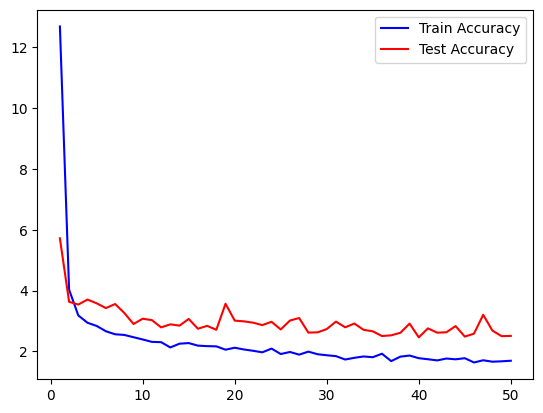

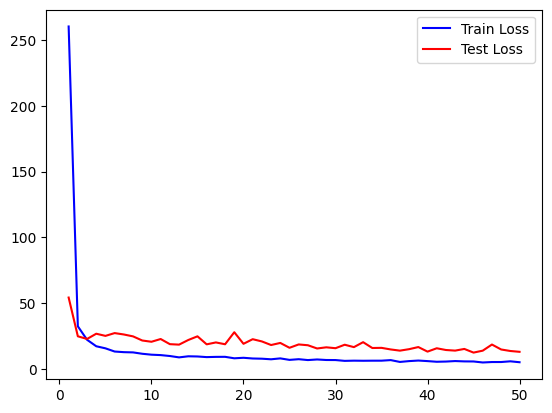

In [78]:
# History of the epochs / iterations
import matplotlib.pyplot as plt

acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()

plt.show()

#**Conclusion:**

The initial model was plagued with overfitting issues, which made it perform poorly on validation dataset

<br>To address this, several modifications, including:
1. Add in dropout rate of 0.1 at each hidden layer.
4. Reducing batch size to 10. 

<br>After these adjustments, the model is able to achieve the best loss (13) and accuracy (2.5). 

<br>In conclusion, the model is capable of making good predictions on new data. However, it is worthwhile to note that the model's current loss value of 13 could potentially be further improved to approach 0 by selectively dropping certain feature variables that have a negligible impact on the output during the model training process. Unfortunately, the dataset provided does not include feature names, making it impossible to identify which features have minimal importance for prediction.